In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
plt.rcParams["figure.figsize"] = [18, 7]
plt.style.use("dark_background")
warnings.filterwarnings("ignore")

path = "/home/lyoh001/vscode/Azure/prb0041108/log.csv"
df, y_label = pd.read_csv(path, delimiter=",", thousands=","), "log"
df["time"] = pd.to_datetime((df["date"] + " " + df["time"]), format="%d %b %Y %H:%M:%S")
display(df)

,date,time,log
0,18 May 2018,2018-05-18 14:07:17,Get-IniContent:: Processing file: ProcessChris21mails.ini
1,18 May 2018,2018-05-18 14:07:17,Get-IniContent:: Finished Processing file: ProcessChris21mails.ini
2,18 May 2018,2018-05-18 14:07:18,Loading OutlookLib.psm1
3,18 May 2018,2018-05-18 14:07:18,Loading complete OutlookLib.psm1
4,18 May 2018,2018-05-18 14:07:18,Logging in with: srv-prd-stscripts@cenitex.vic.gov.au
...,...,...,...
17298,16 May 2022,2022-05-16 08:15:55,"Error in connecting:Exception calling ""GetInboxRules"" with ""0"" argument(s): ""The request failed. The underlying connection was closed: An unexpected error occurred on a send."""
17299,16 May 2022,2022-05-16 08:16:10,Logging Attempt No: 5 with: srv-prd-stscripts@cenitex.vic.gov.au
17300,16 May 2022,2022-05-16 08:16:10,"Error in connecting:Exception calling ""GetInboxRules"" with ""0"" argument(s): ""The request failed. The underlying connection was closed: An unexpected error occurred on a send."""
17301,16 May 2022,2022-05-16 08:16:25,No Exchange connection created


In [2]:
import mitosheet
mitosheet.sheet(display(df), view_df=True)

,date,time,log
0,18 May 2018,2018-05-18 14:07:17,Get-IniContent:: Processing file: ProcessChris21mails.ini
1,18 May 2018,2018-05-18 14:07:17,Get-IniContent:: Finished Processing file: ProcessChris21mails.ini
2,18 May 2018,2018-05-18 14:07:18,Loading OutlookLib.psm1
3,18 May 2018,2018-05-18 14:07:18,Loading complete OutlookLib.psm1
4,18 May 2018,2018-05-18 14:07:18,Logging in with: srv-prd-stscripts@cenitex.vic.gov.au
...,...,...,...
17298,16 May 2022,2022-05-16 08:15:55,"Error in connecting:Exception calling ""GetInboxRules"" with ""0"" argument(s): ""The request failed. The underlying connection was closed: An unexpected error occurred on a send."""
17299,16 May 2022,2022-05-16 08:16:10,Logging Attempt No: 5 with: srv-prd-stscripts@cenitex.vic.gov.au
17300,16 May 2022,2022-05-16 08:16:10,"Error in connecting:Exception calling ""GetInboxRules"" with ""0"" argument(s): ""The request failed. The underlying connection was closed: An unexpected error occurred on a send."""
17301,16 May 2022,2022-05-16 08:16:25,No Exchange connection created


MitoWidget(analysis_data_json='{"analysisName": "UUID-394e8aaf-41f7-4498-badf-0680aa4b1f10", "code": {"imports…

In [3]:
from mitosheet import *; register_analysis('UUID-394e8aaf-41f7-4498-badf-0680aa4b1f10')
    
# Imported log.csv
import pandas as pd
log = pd.read_csv(r'log.csv')


Text(0.5, 1.0, 'Total Execution Count per Year')

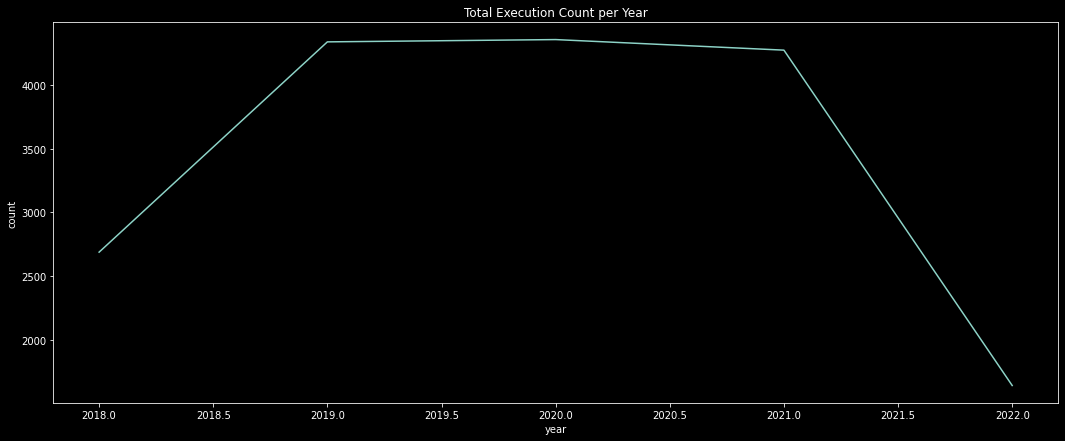

In [4]:
df_execution_count = df.groupby(df["time"].dt.year)["date"].count().to_frame().reset_index()
df_execution_count.columns = ["year", "count"]
df_execution_count["year"] = df_execution_count["year"].astype(np.int)
sns.lineplot(x="year", y="count", data=df_execution_count).set_title(f"Total Execution Count per Year")

Text(0.5, 1.0, 'Total Execution Count per Year')

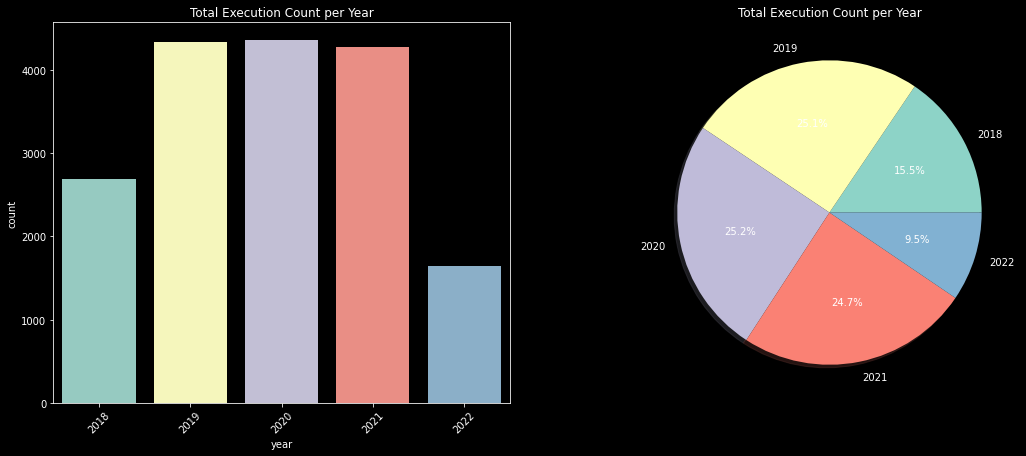

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
sns.barplot(x="year", y="count", data=df_execution_count, ax=ax[0]).set_title(f"Total Execution Count per Year")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
df_execution_count["count"]
ax[1].pie(x=df_execution_count["count"], autopct="%.1f%%", shadow=True, labels=df_execution_count["year"].value_counts().index)
ax[1].set_title("Total Execution Count per Year")

Text(0.5, 1.0, 'Total number of errors per Year')

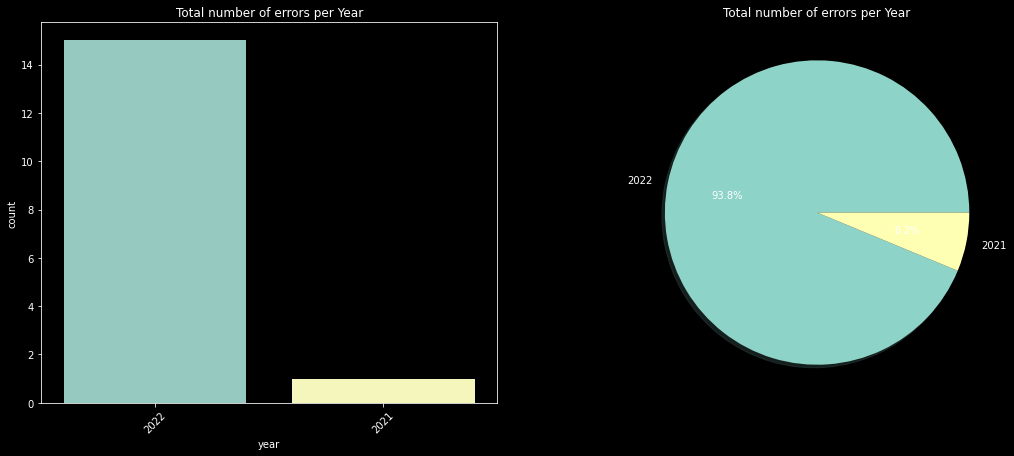

In [6]:
df_error = df.groupby("date")["log"].sum().to_frame()
df_error_date = pd.DataFrame(pd.to_datetime(df_error[df_error["log"].map(lambda log: "error" in log.lower() or "fail" in log.lower())].index, format="%d %b %Y"))
df_error_date["year"] = df_error_date["date"].astype(str).str.split("-").str.get(0)
df_error_date["month"] = df_error_date["date"].astype(str).str.split("-").str.get(1)
fig, ax = plt.subplots(nrows=1, ncols=2)
sns.countplot(x=df_error_date["year"], ax=ax[0]).set_title("Total number of errors per Year")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[1].pie(x=df_error_date["year"].value_counts(), autopct="%.1f%%", shadow=True, labels=df_error_date["year"].value_counts().index)
ax[1].set_title("Total number of errors per Year")

Text(0.5, 1.0, 'Execution Time (Latest)')

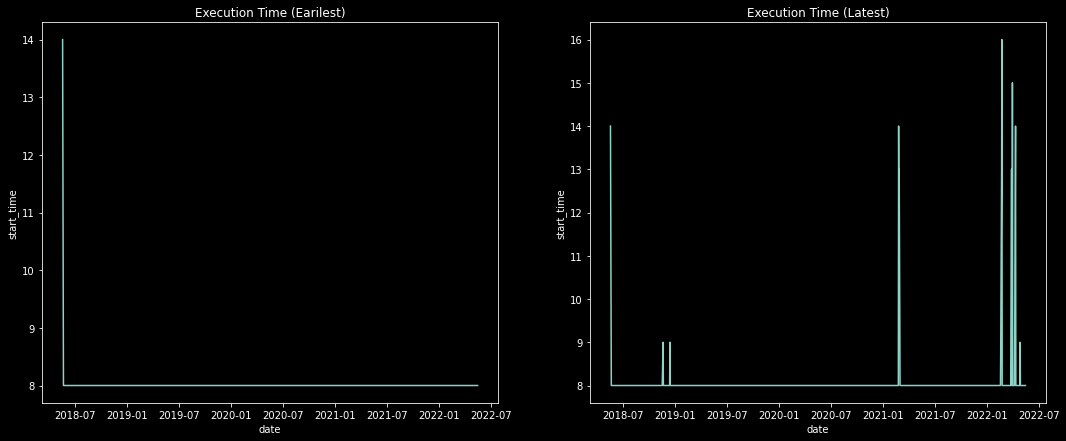

In [7]:
df_execution_time_earliest = df.groupby("date")["time"].min().dt.hour.to_frame().reset_index()
df_execution_time_earliest.columns = ["date", "start_time"]
df_execution_time_earliest.sort_values(by="start_time", ascending=False)
df_execution_time_earliest["date"] = pd.to_datetime(df_execution_time_earliest["date"], format="%d %b %Y")

df_execution_time_latest = df.groupby("date")["time"].max().dt.hour.to_frame().reset_index()
df_execution_time_latest.columns = ["date", "start_time"]
df_execution_time_latest.sort_values(by="start_time", ascending=False)
df_execution_time_latest["date"] = pd.to_datetime(df_execution_time_latest["date"], format="%d %b %Y")

fig, ax = plt.subplots(nrows=1, ncols=2)
sns.lineplot(x="date", y="start_time", data=df_execution_time_earliest, ax=ax[0]).set_title(f"Execution Time (Earilest)")
sns.lineplot(x="date", y="start_time", data=df_execution_time_latest, ax=ax[1]).set_title(f"Execution Time (Latest)")

Text(0.5, 1.0, 'Total Execution Time in Seconds')

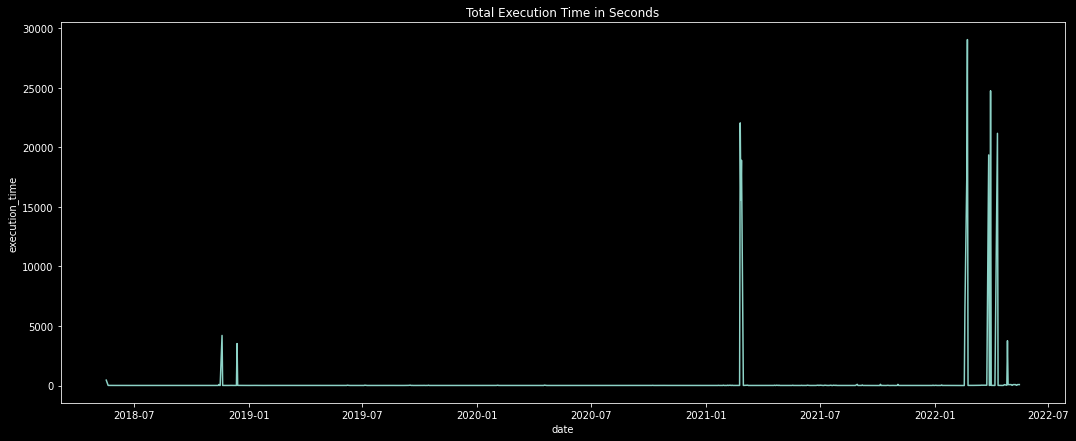

In [8]:
df_execution_time = (df.groupby("date")["time"].max() - df.groupby("date")["time"].min()).dt.total_seconds().to_frame().reset_index()
df_execution_time.columns = ["date", "execution_time"]
df_execution_time["date"] = pd.to_datetime(df_execution_time["date"], format="%d %b %Y")
sns.lineplot(x="date", y="execution_time", data=df_execution_time)
plt.title("Total Execution Time in Seconds")

In [9]:
for error in df[df["log"].astype(str).map(lambda log: "error" in log.lower() or "fail" in log.lower())]["log"]:
    print(error)

Mail processing error - A positional parameter cannot be found that accepts argument ' - '.
Mail processing error - A positional parameter cannot be found that accepts argument '25/02/2021 12:00:00 AM'.
Mail processing error - A positional parameter cannot be found that accepts argument '25/02/2021 12:00:00 AM'.
Error in connecting:
Error in connecting:
Error in connecting:Exception calling "GetInboxRules" with "0" argument(s): "The request failed. The underlying connection was closed: An unexpected error occurred on a send."
Error in connecting:Exception calling "GetInboxRules" with "0" argument(s): "The request failed. The underlying connection was closed: An unexpected error occurred on a send."
Error in connecting:Exception calling "GetInboxRules" with "0" argument(s): "The request failed. The underlying connection was closed: An unexpected error occurred on a send."
Error in connecting:Exception calling "GetInboxRules" with "0" argument(s): "The request failed. The underlying conn